In [1]:
!pip install gymnasium
!pip install matplotlib
!pip install numpy
!pip install pygame

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

class GridWorld:
    def __init__(self, size=4):
        self.size = size
        self.rewards = np.zeros((size, size))
        self.rewards[size-1, size-1] = 1  # Goal state
        self.actions = ["up", "right", "down", "left"]
        self.reset()

    def reset(self):
        self.current_pos = [0, 0]
        return self.get_state()

    def get_state(self):
        return tuple(self.current_pos)

    def step(self, action):
        # Move according to action
        if action == "up" and self.current_pos[0] > 0:
            self.current_pos[0] -= 1
        elif action == "right" and self.current_pos[1] < self.size - 1:
            self.current_pos[1] += 1
        elif action == "down" and self.current_pos[0] < self.size - 1:
            self.current_pos[0] += 1
        elif action == "left" and self.current_pos[1] > 0:
            self.current_pos[1] -= 1

        state = self.get_state()
        reward = self.rewards[state]
        done = (state[0] == self.size-1 and state[1] == self.size-1)

        return state, reward, done

    def visualize(self, q_values=None):
        """
        Visualize the GridWorld and optionally the Q-values.

        Args:
            q_values: Dictionary mapping states to a dictionary of actions and their Q-values
        """
        fig, ax = plt.subplots(figsize=(8, 8))

        # Draw grid
        for i in range(self.size + 1):
            ax.axhline(i, color='black', linewidth=1)
            ax.axvline(i, color='black', linewidth=1)

        # Color goal state
        goal = plt.Rectangle((self.size-1, 0), 1, 1, color='lightgreen', alpha=0.5)
        ax.add_patch(goal)

        # Mark current position
        current = plt.Circle((self.current_pos[1] + 0.5, self.size - self.current_pos[0] - 0.5),
                            0.3, color='blue', alpha=0.7)
        ax.add_patch(current)

        # Show start state
        start_text = ax.text(0.5, self.size - 0.5, "S", fontsize=20, ha='center', va='center')

        # Show goal state
        goal_text = ax.text(self.size - 0.5, 0.5, "G", fontsize=20, ha='center', va='center')

        # If Q-values are provided, visualize the policy and values
        if q_values is not None:
            for i in range(self.size):
                for j in range(self.size):
                    state = (i, j)
                    if state in q_values:
                        # Get best action and its value
                        best_action = max(q_values[state], key=q_values[state].get)
                        best_value = q_values[state][best_action]

                        # Skip goal state
                        if i == self.size-1 and j == self.size-1:
                            continue

                        # Show arrow for best action
                        if best_action == "up":
                            ax.arrow(j + 0.5, self.size - i - 0.5, 0, -0.4, head_width=0.2, head_length=0.2, fc='k', ec='k')
                        elif best_action == "right":
                            ax.arrow(j + 0.5, self.size - i - 0.5, 0.4, 0, head_width=0.2, head_length=0.2, fc='k', ec='k')
                        elif best_action == "down":
                            ax.arrow(j + 0.5, self.size - i - 0.5, 0, 0.4, head_width=0.2, head_length=0.2, fc='k', ec='k')
                        elif best_action == "left":
                            ax.arrow(j + 0.5, self.size - i - 0.5, -0.4, 0, head_width=0.2, head_length=0.2, fc='k', ec='k')

                        # Show Q-value
                        ax.text(j + 0.7, self.size - i - 0.3, f"{best_value:.2f}", fontsize=8)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(np.arange(0.5, self.size, 1))
        ax.set_yticks(np.arange(0.5, self.size, 1))
        ax.set_xticklabels(range(self.size))
        ax.set_yticklabels(range(self.size-1, -1, -1))
        ax.set_title("GridWorld")
        plt.tight_layout()
        plt.show()

In [3]:
def q_learning(env, episodes=100, alpha=0.1, gamma=0.9, epsilon=0.1):
    # Initialize Q-table
    q_table = {}
    for i in range(env.size):
        for j in range(env.size):
            q_table[(i, j)] = {action: 0 for action in env.actions}

    # Training loop
    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = np.random.choice(env.actions)
            else:
                action = max(q_table[state], key=q_table[state].get)

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Q-value update
            best_next_value = max(q_table[next_state].values())
            q_table[state][action] += alpha * (reward + gamma * best_next_value - q_table[state][action])

            state = next_state

        rewards_per_episode.append(total_reward)

        # Visualize progress occasionally
        if episode % 20 == 0 or episode == episodes - 1:
            print(f"Episode {episode}")
            env.visualize(q_table)

    # Plot rewards per episode
    plt.figure(figsize=(10, 5))
    plt.plot(rewards_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Rewards per Episode')
    plt.show()

    return q_table

In [4]:
def q_learning(env, episodes=100, alpha=0.1, gamma=0.9, epsilon=0.1):
    # Initialize Q-table
    q_table = {}
    for i in range(env.size):
        for j in range(env.size):
            q_table[(i, j)] = {action: 0 for action in env.actions}

    # Training loop
    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = np.random.choice(env.actions)
            else:
                action = max(q_table[state], key=q_table[state].get)

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Q-value update
            best_next_value = max(q_table[next_state].values())
            q_table[state][action] += alpha * (reward + gamma * best_next_value - q_table[state][action])

            state = next_state

        rewards_per_episode.append(total_reward)

        # Visualize progress occasionally
        if episode % 20 == 0 or episode == episodes - 1:
            print(f"Episode {episode}")
            env.visualize(q_table)

    # Plot rewards per episode
    plt.figure(figsize=(10, 5))
    plt.plot(rewards_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Rewards per Episode')
    plt.show()

    return q_table

Initial environment:


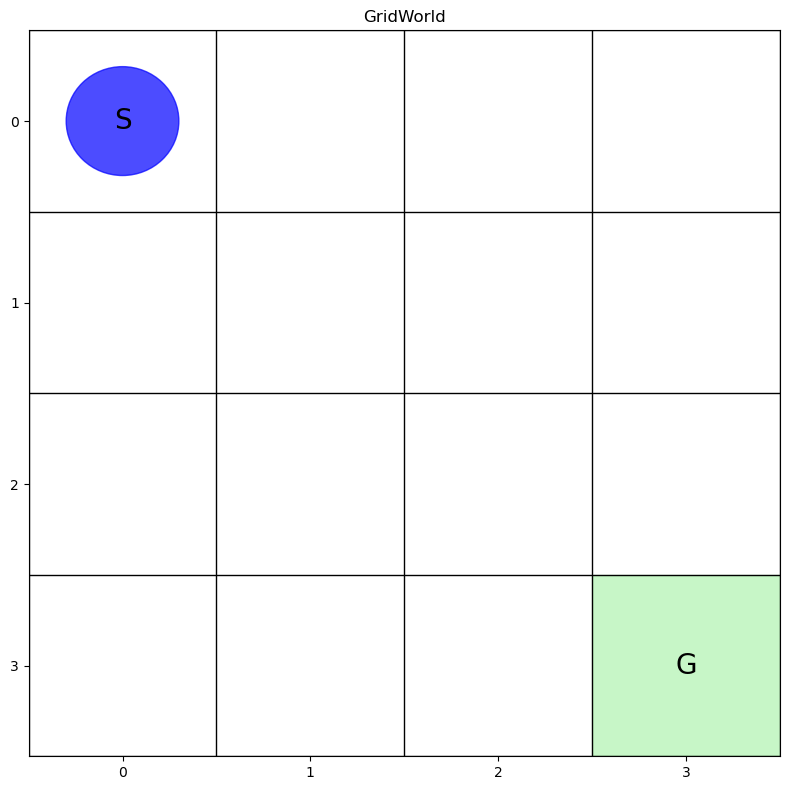

Training agent...
Episode 0


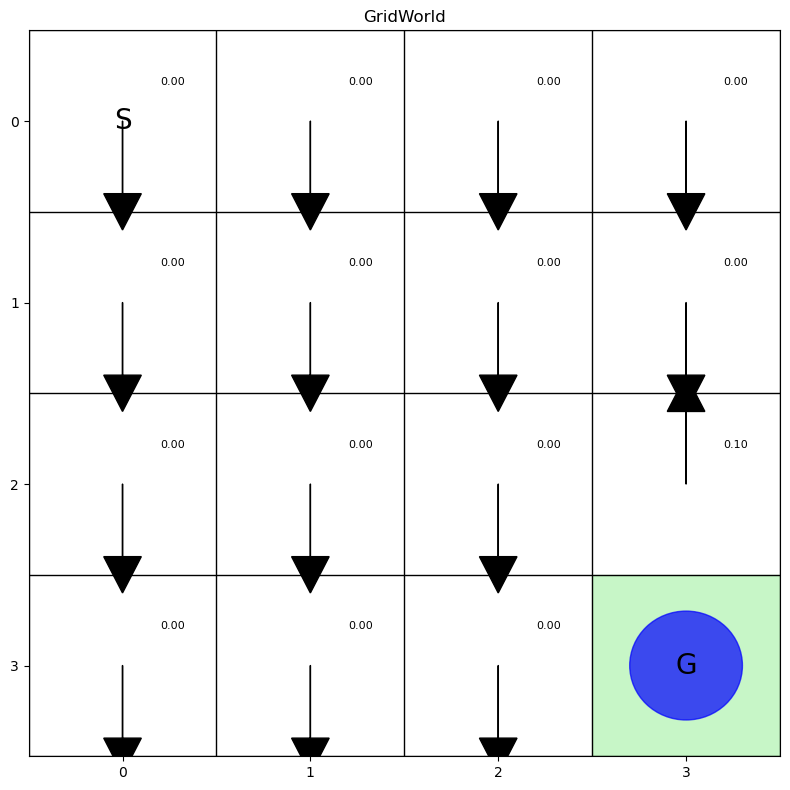

Episode 20


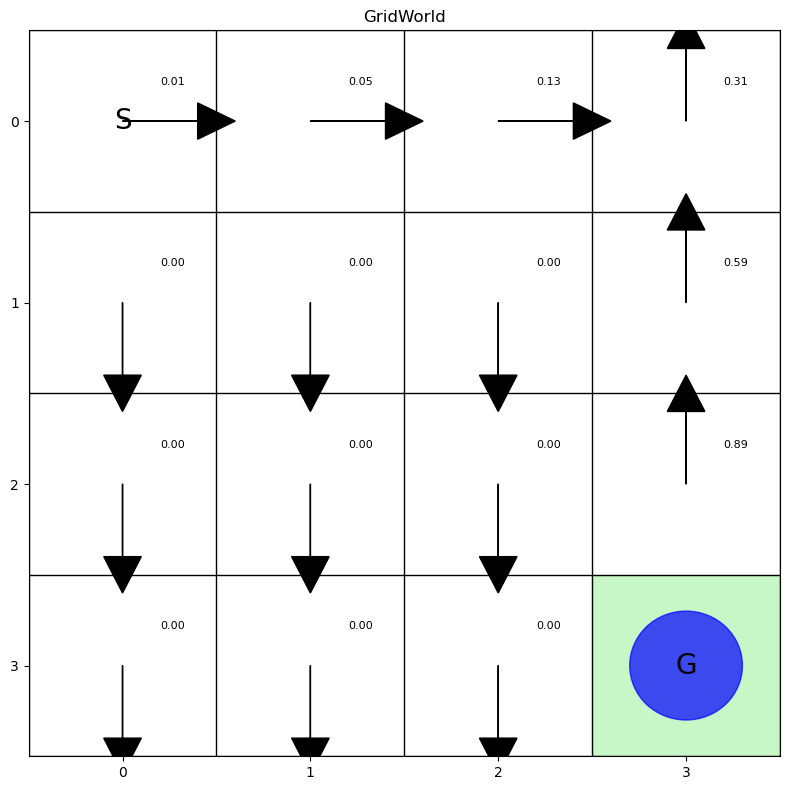

Episode 40


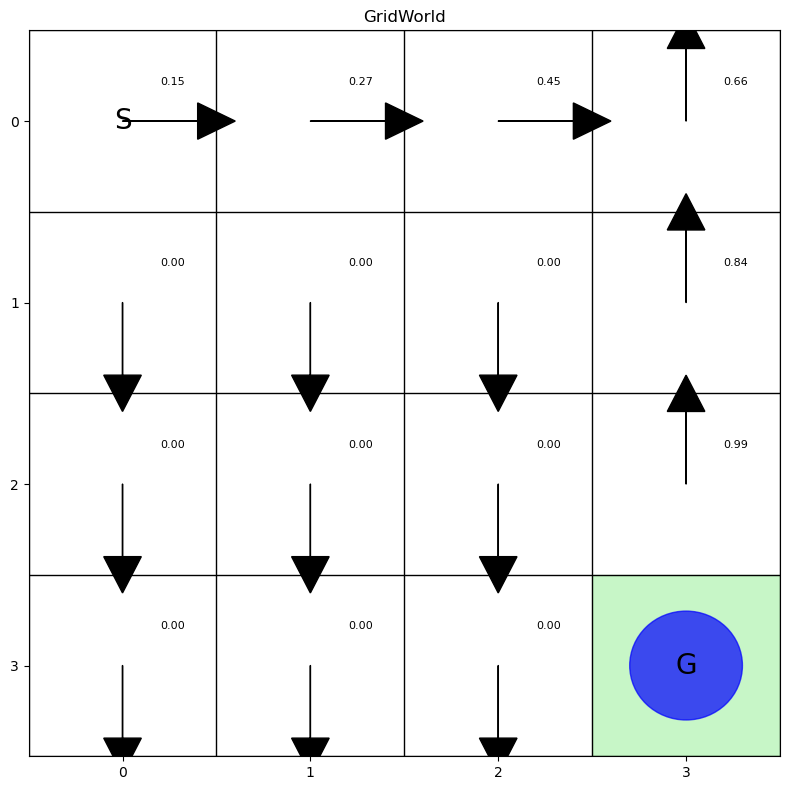

Episode 60


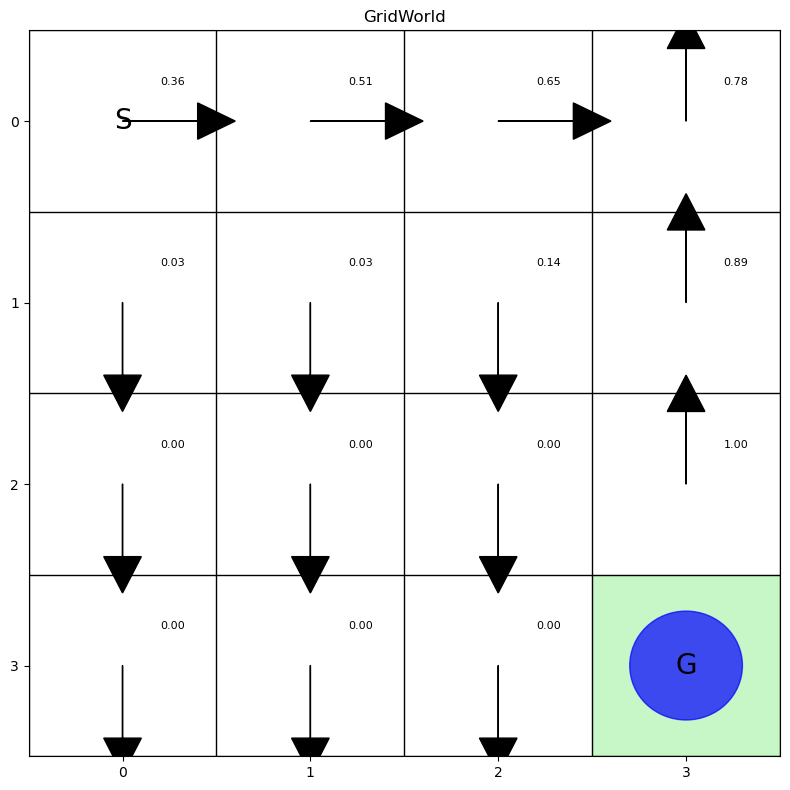

Episode 80


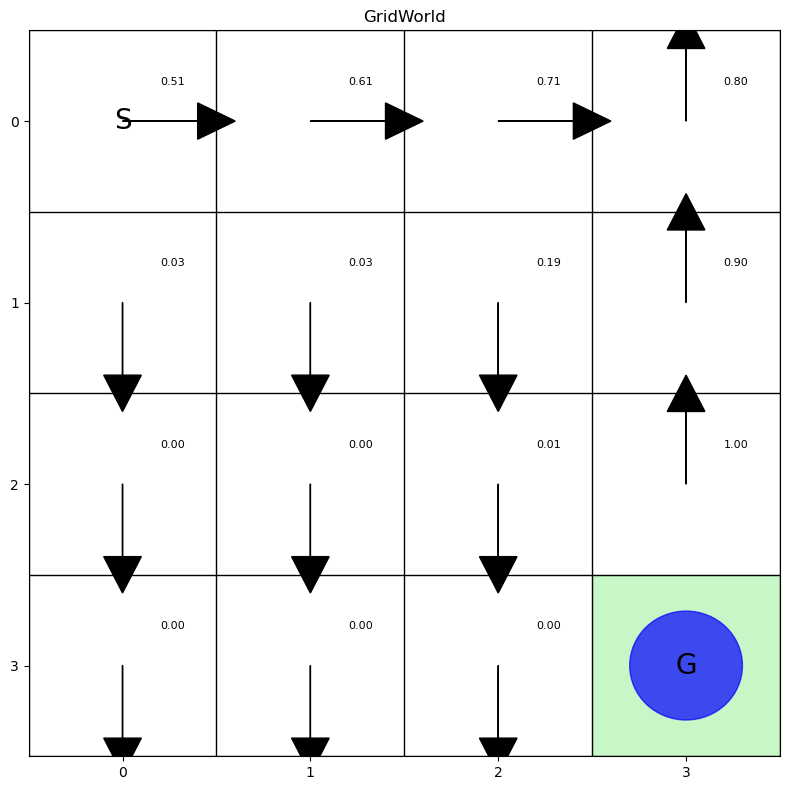

Episode 100


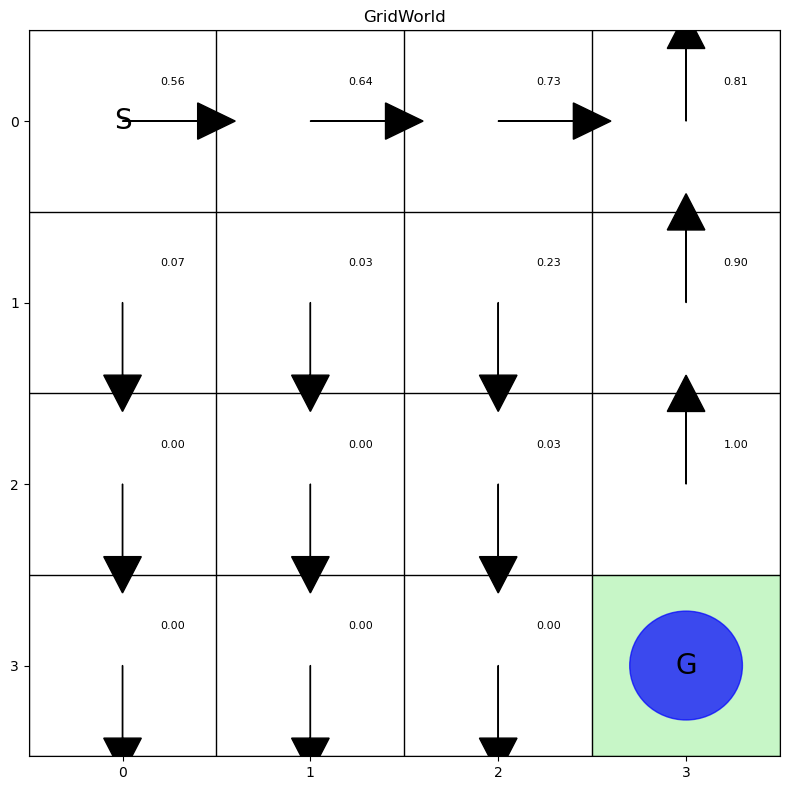

Episode 120


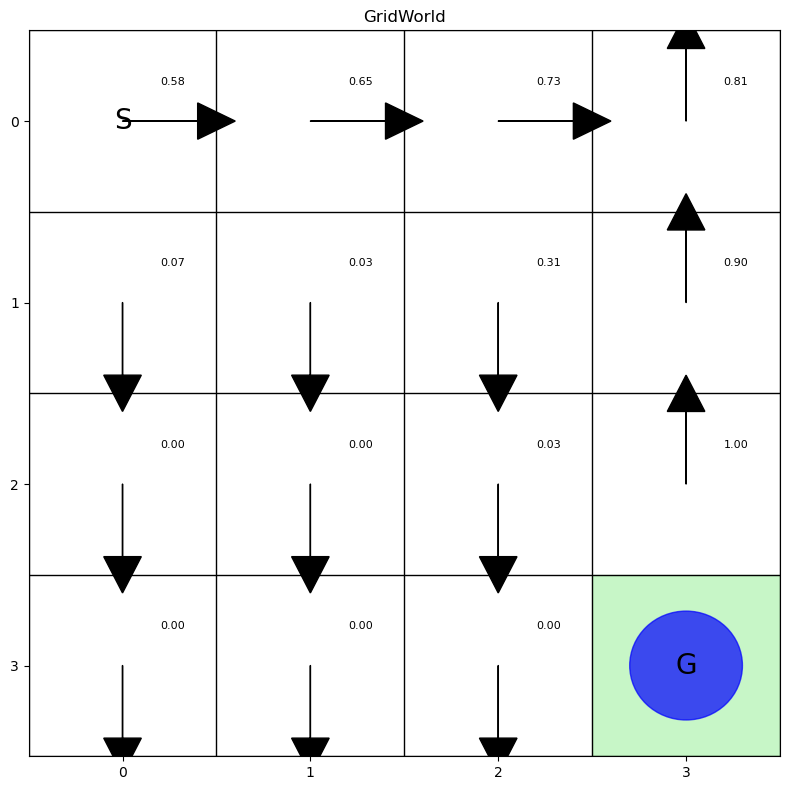

Episode 140


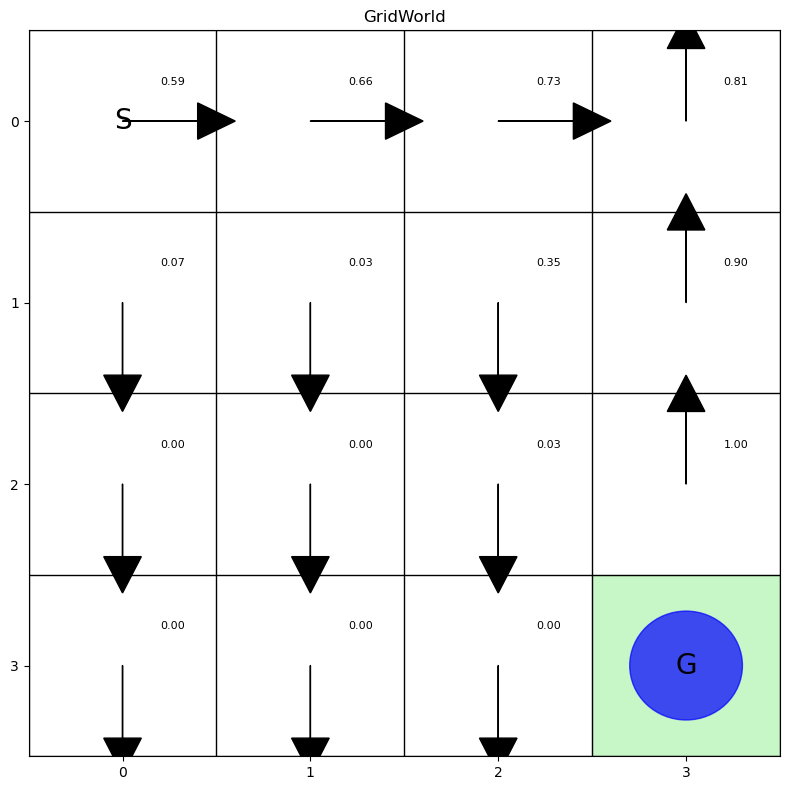

Episode 160


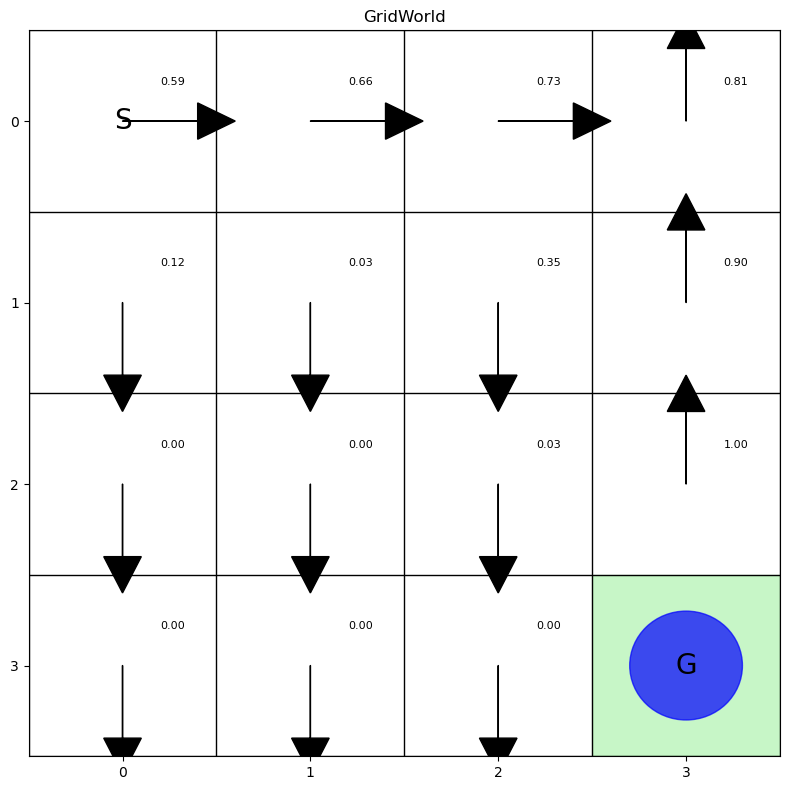

Episode 180


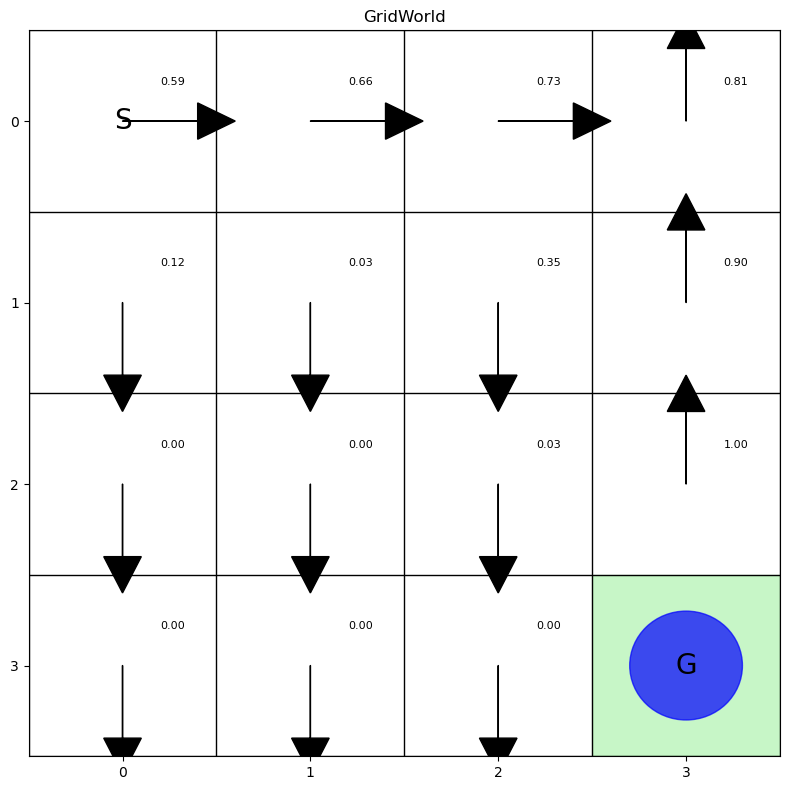

Episode 199


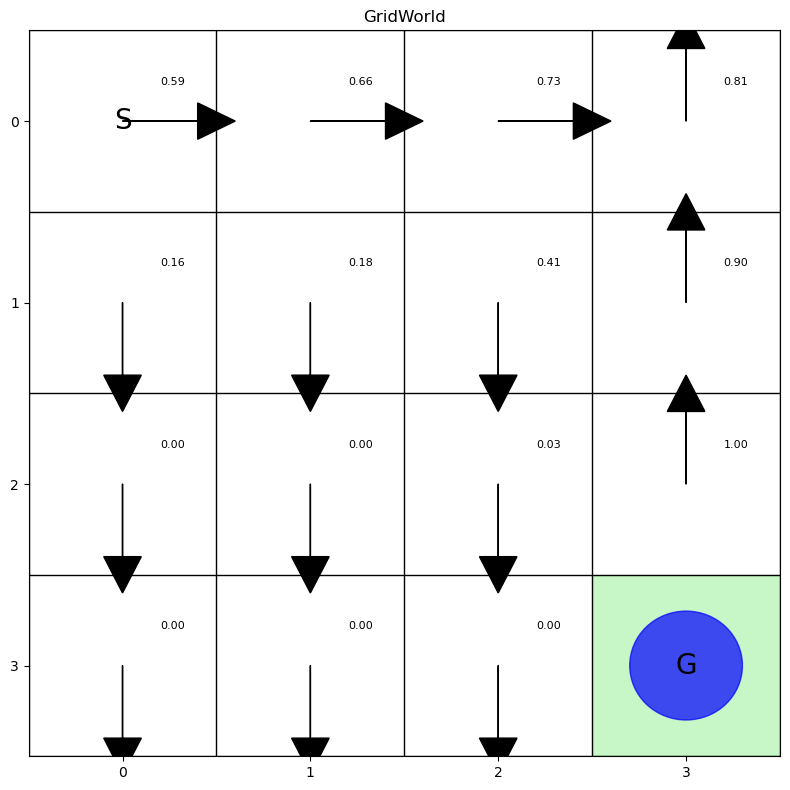

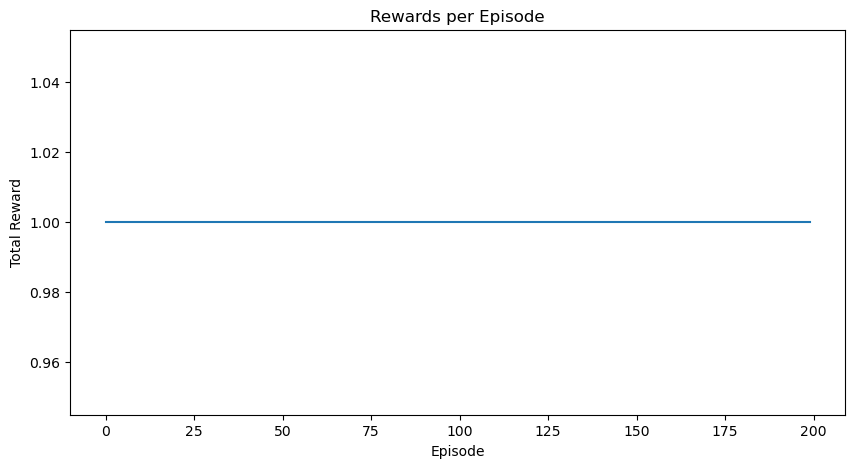


Testing trained agent:
Starting from initial state:


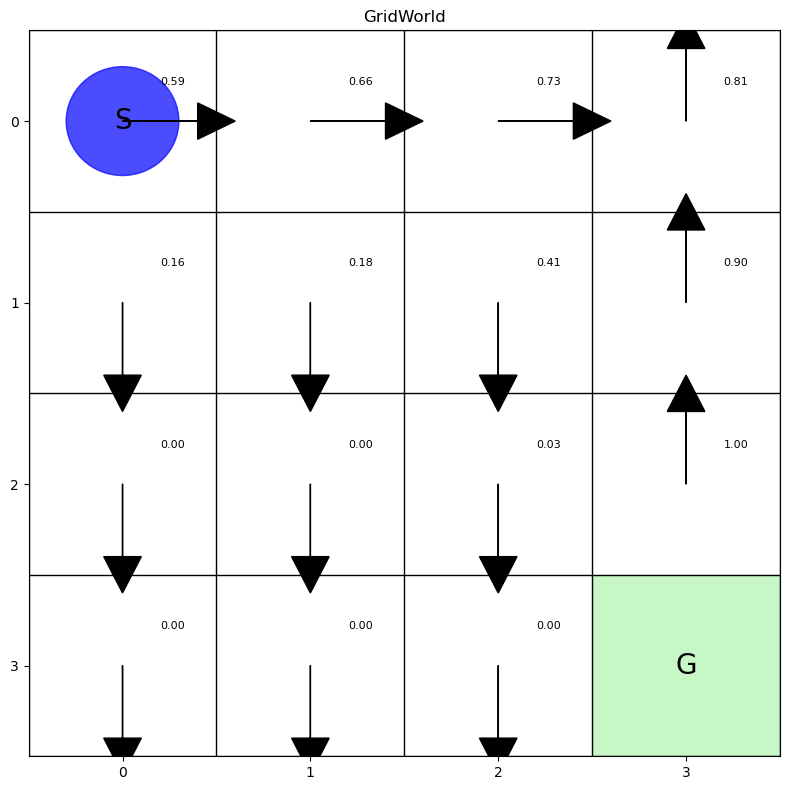

Step 1: Action = right, New State = (0, 1), Reward = 0.0


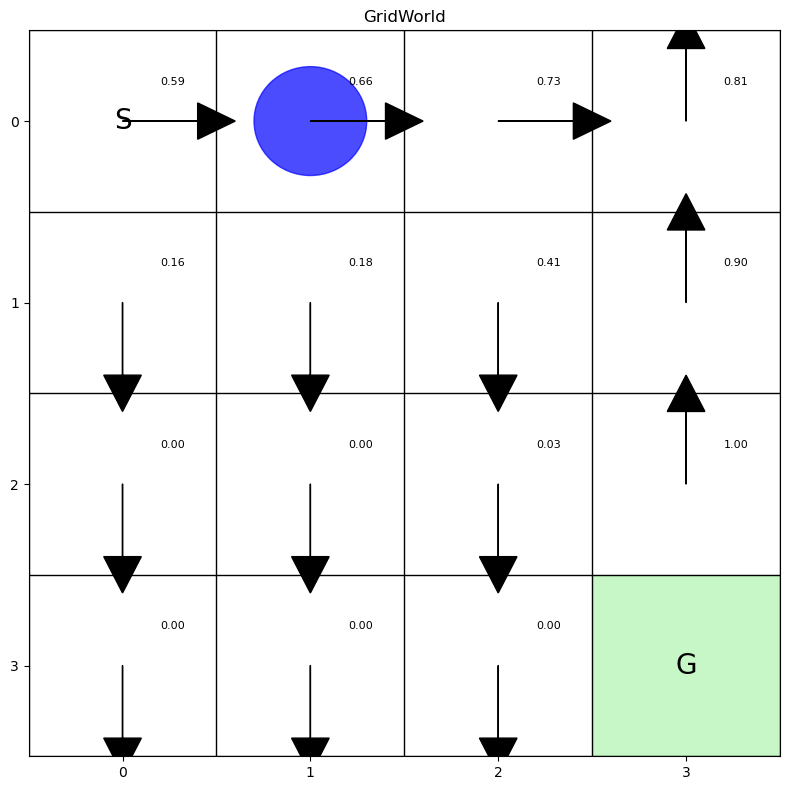

Step 2: Action = right, New State = (0, 2), Reward = 0.0


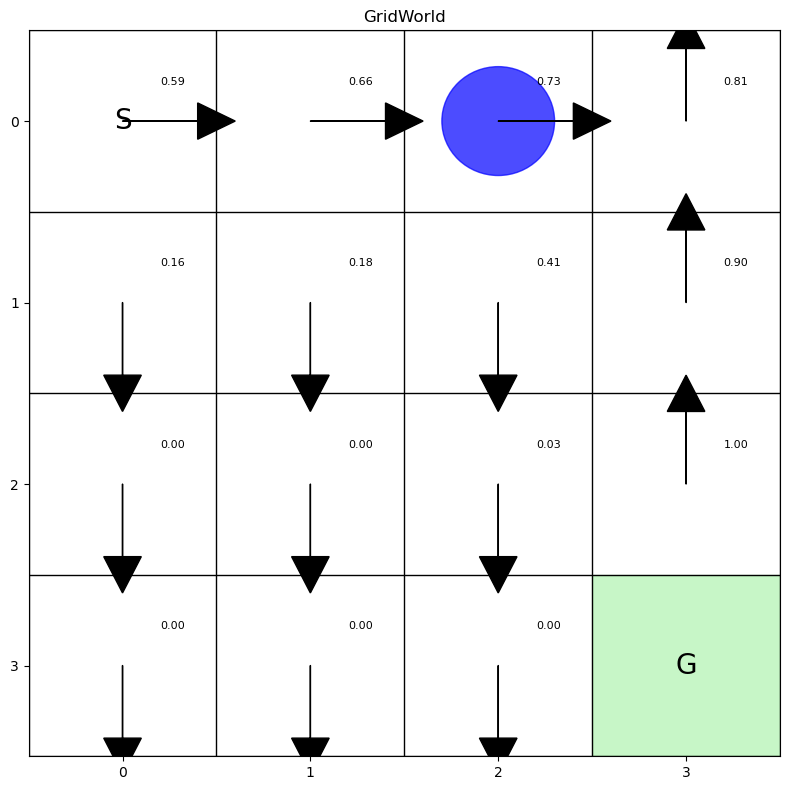

Step 3: Action = right, New State = (0, 3), Reward = 0.0


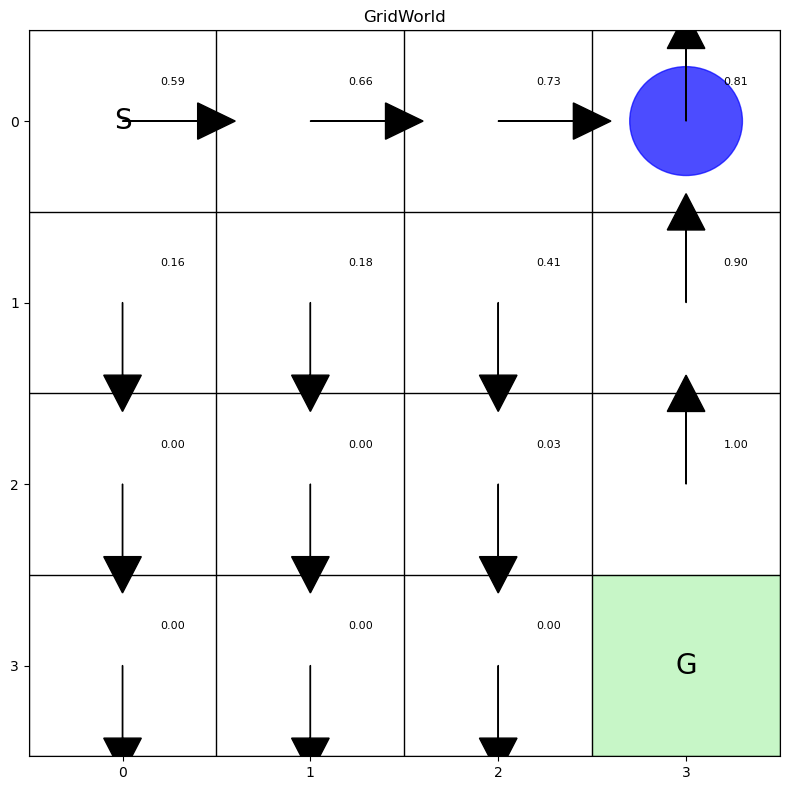

Step 4: Action = down, New State = (1, 3), Reward = 0.0


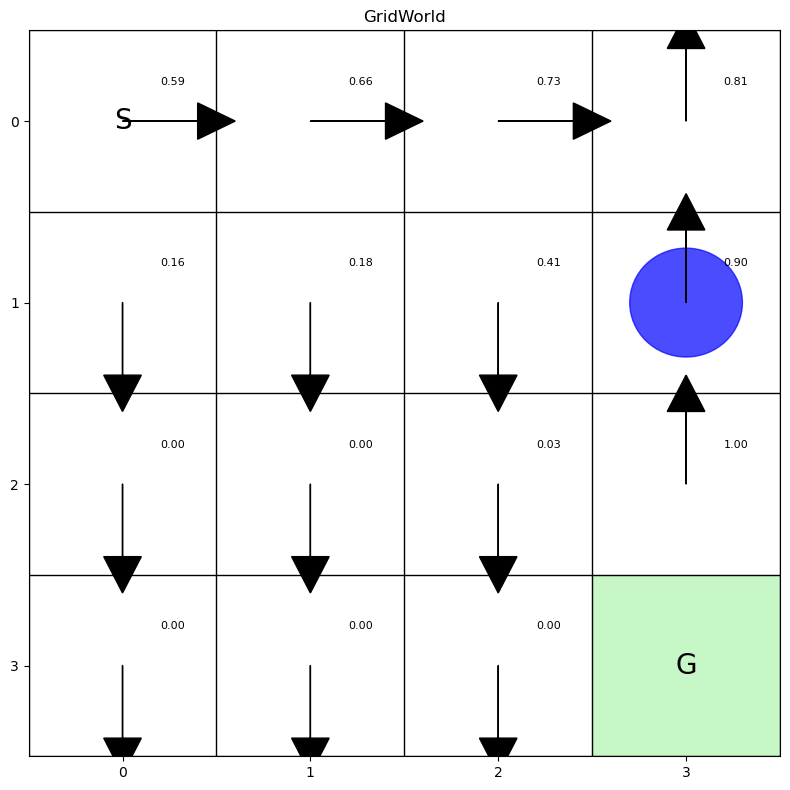

Step 5: Action = down, New State = (2, 3), Reward = 0.0


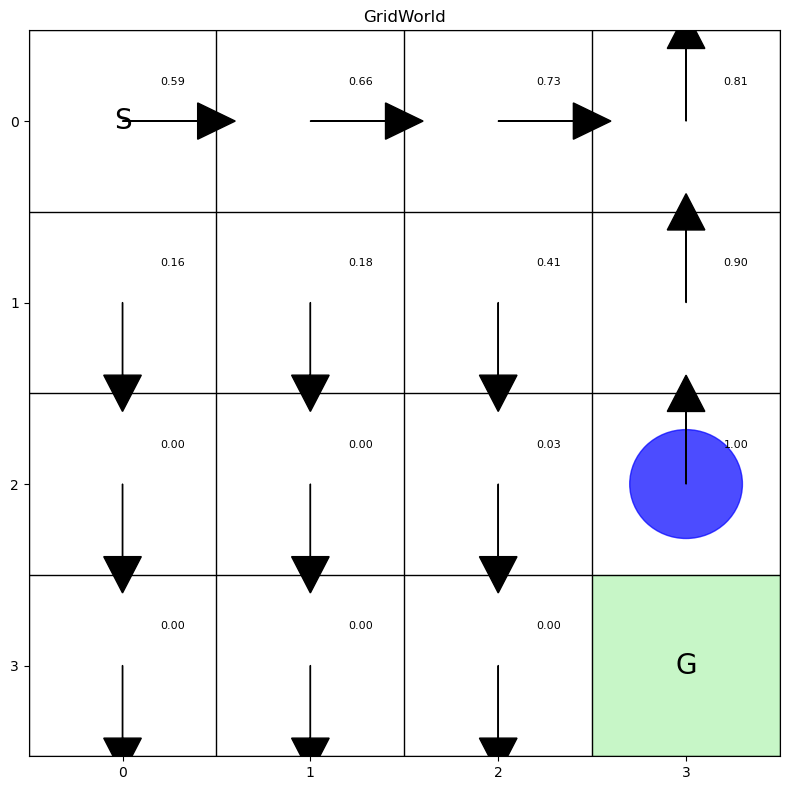

Step 6: Action = down, New State = (3, 3), Reward = 1.0


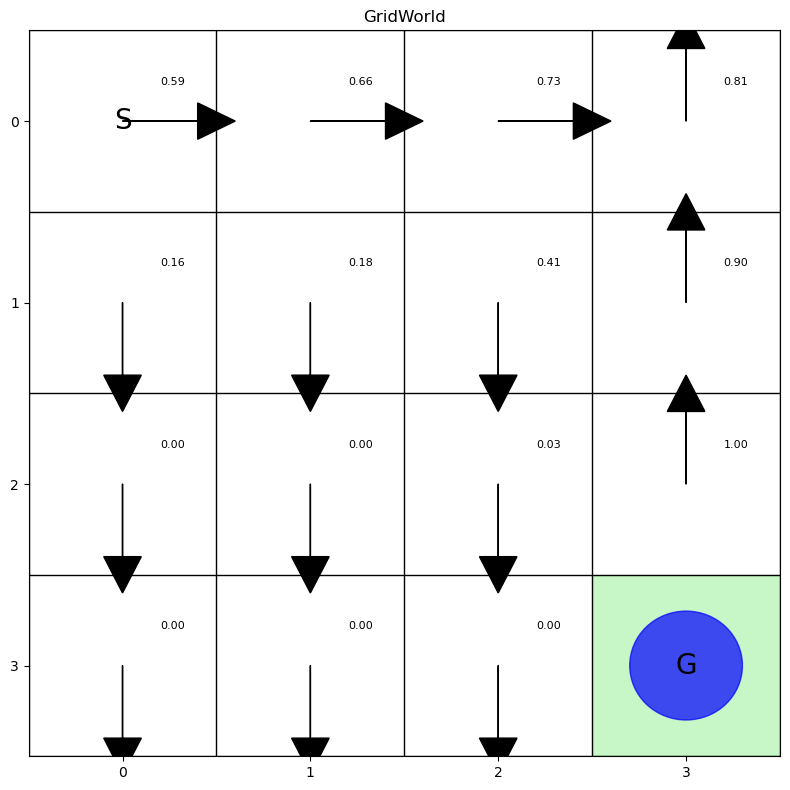

Episode completed in 6 steps with total reward: 1.0

Final policy:


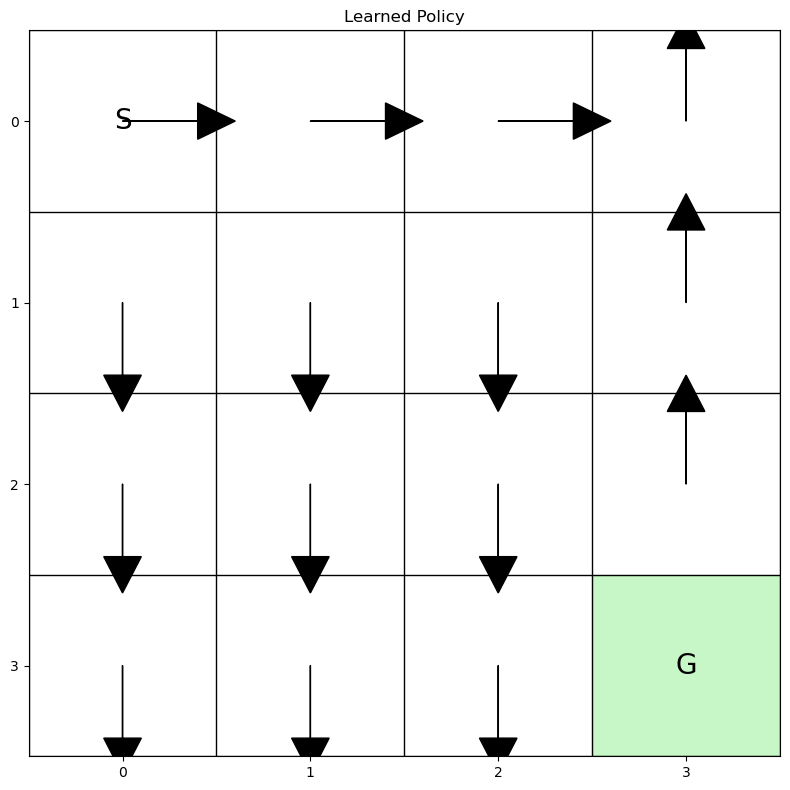

In [5]:
# Create environment
env = GridWorld(size=4)

# Show initial environment
print("Initial environment:")
env.visualize()

# Train agent
print("Training agent...")
q_table = q_learning(env, episodes=200, alpha=0.1, gamma=0.9, epsilon=0.1)

# Test the trained agent
def run_episode(env, q_table, render=True):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0

    if render:
        print("Starting from initial state:")
        env.visualize(q_table)

    while not done:
        # Select best action
        action = max(q_table[state], key=q_table[state].get)

        # Take action
        state, reward, done = env.step(action)
        total_reward += reward
        steps += 1

        if render:
            print(f"Step {steps}: Action = {action}, New State = {state}, Reward = {reward}")
            env.visualize(q_table)

    return total_reward, steps

print("\nTesting trained agent:")
total_reward, steps = run_episode(env, q_table, render=True)
print(f"Episode completed in {steps} steps with total reward: {total_reward}")

# Visualize final policy (without agent)
def visualize_policy(env, q_table):
    policy = np.empty((env.size, env.size), dtype=object)
    for i in range(env.size):
        for j in range(env.size):
            state = (i, j)
            policy[i, j] = max(q_table[state], key=q_table[state].get)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw grid
    for i in range(env.size + 1):
        ax.axhline(i, color='black', linewidth=1)
        ax.axvline(i, color='black', linewidth=1)

    # Color goal state
    goal = plt.Rectangle((env.size-1, 0), 1, 1, color='lightgreen', alpha=0.5)
    ax.add_patch(goal)

    # Show arrows for policy
    for i in range(env.size):
        for j in range(env.size):
            # Skip goal state
            if i == env.size-1 and j == env.size-1:
                continue

            action = policy[i, j]
            if action == "up":
                ax.arrow(j + 0.5, env.size - i - 0.5, 0, -0.4, head_width=0.2, head_length=0.2, fc='k', ec='k')
            elif action == "right":
                ax.arrow(j + 0.5, env.size - i - 0.5, 0.4, 0, head_width=0.2, head_length=0.2, fc='k', ec='k')
            elif action == "down":
                ax.arrow(j + 0.5, env.size - i - 0.5, 0, 0.4, head_width=0.2, head_length=0.2, fc='k', ec='k')
            elif action == "left":
                ax.arrow(j + 0.5, env.size - i - 0.5, -0.4, 0, head_width=0.2, head_length=0.2, fc='k', ec='k')

    # Show start state
    ax.text(0.5, env.size - 0.5, "S", fontsize=20, ha='center', va='center')

    # Show goal state
    ax.text(env.size - 0.5, 0.5, "G", fontsize=20, ha='center', va='center')

    ax.set_xlim(0, env.size)
    ax.set_ylim(0, env.size)
    ax.set_xticks(np.arange(0.5, env.size, 1))
    ax.set_yticks(np.arange(0.5, env.size, 1))
    ax.set_xticklabels(range(env.size))
    ax.set_yticklabels(range(env.size-1, -1, -1))
    ax.set_title("Learned Policy")
    plt.tight_layout()
    plt.show()

print("\nFinal policy:")
visualize_policy(env, q_table)